<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Encode-the-Categorical-columns:-City,-Toss_decision-and-Venue." data-toc-modified-id="Encode-the-Categorical-columns:-City,-Toss_decision-and-Venue.-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Encode the Categorical columns: City, Toss_decision and Venue.</a></span></li></ul></li><li><span><a href="#Split-dataset-X-into-Train-and-Test" data-toc-modified-id="Split-dataset-X-into-Train-and-Test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Split dataset X into Train and Test</a></span></li><li><span><a href="#Model-Performance-Metrics-Function." data-toc-modified-id="Model-Performance-Metrics-Function.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model Performance Metrics Function.</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Compare-ROC-curves-and-Calculate-Area-under-the-curve-for-all-models" data-toc-modified-id="Compare-ROC-curves-and-Calculate-Area-under-the-curve-for-all-models-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Compare ROC curves and Calculate Area under the curve for all models</a></span></li></ul></li></ul></li><li><span><a href="#Building-a-Random-Forest-Classifier-Model-and-fit-it-on-the-Training-Set" data-toc-modified-id="Building-a-Random-Forest-Classifier-Model-and-fit-it-on-the-Training-Set-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Building a Random Forest Classifier Model and fit it on the Training Set</a></span><ul class="toc-item"><li><span><a href="#Grid-Search-Cross-Validation-of-Random-Forest-Features" data-toc-modified-id="Grid-Search-Cross-Validation-of-Random-Forest-Features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Grid Search Cross Validation of Random Forest Features</a></span></li><li><span><a href="#Generate-Training-data-Model-performance-Metrics" data-toc-modified-id="Generate-Training-data-Model-performance-Metrics-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Generate Training data Model performance Metrics</a></span></li></ul></li><li><span><a href="#Verify-the-Predictions-on-Testing-Dataset" data-toc-modified-id="Verify-the-Predictions-on-Testing-Dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Verify the Predictions on Testing Dataset</a></span></li><li><span><a href="#Get-Predicted-Winner-for-the-given-input-below." data-toc-modified-id="Get-Predicted-Winner-for-the-given-input-below.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get Predicted Winner for the given input below.</a></span></li></ul></div>

In [58]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve


In [83]:
matches=pd.read_csv('matches.csv')
#deliveries=pd.read_csv('deliveries.csv')

In [84]:
matches2020 = matches.copy()

In [85]:
matches.drop(columns=['umpire1','umpire2','umpire3','id','date','result','dl_applied'], inplace=True)

In [86]:
matches.dropna(axis=0, subset=['season', 'winner'], inplace=True)

In [87]:
matches1 = matches[['season','team1','team2','city','toss_decision','toss_winner','venue','winner']].copy()

### Encode the Categorical columns: City, Toss_decision and Venue.

In [88]:
# Create dictionary of Team names and team codes.
teams = {'team_names': {'Chennai Super Kings':'CSK', 'Deccan Chargers':'DCH', 'Delhi Capitals':'DC',
       'Delhi Daredevils':'DD', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Kochi Tuskers Kerala':'KTK', 'Kolkata Knight Riders':'KKR', 'Mumbai Indians':'MI',
       'Pune Warriors':'PW', 'Rajasthan Royals':'RR', 'Rising Pune Supergiant':'RPS',
       'Rising Pune Supergiants':'RPS', 'Royal Challengers Bangalore':'RCB',
       'Sunrisers Hyderabad':'SRH', 'Tie':'TIE'}, 
         
         'team_codes': {'MI':1, 'CSK':2, 'KKR':3, 'RCB':4, 'KXIP':5, 'RR':6, 'SRH':7, 'DC':8,   
              'DD':9, 'DCH':10, 'GL':11, 'KTK':12, 'PW':13, 'RPS':14, 'TIE':15},
         
         'team_codes_rev': {1:'MI', 2:'CSK', 3:'KKR', 4:'RCB', 5:'KXIP', 6:'RR', 7:'SRH', 8:'DC',   
              9:'DD', 10:'DCH', 11:'GL', 12:'KTK', 13:'PW', 14:'RPS', 15:'TIE'}
        }

In [89]:
# Encode venue, city and toss_decision columns using Sklearn LabelEncoder

from sklearn.preprocessing import LabelEncoder
le_venue = LabelEncoder()
le_venue = le_venue.fit(matches1['venue'])
le_city = LabelEncoder()
le_city = le_city.fit(matches1['city'])
le_toss = LabelEncoder()
le_toss = le_toss.fit(matches1['toss_decision'])

def to_numerical(df, teams, le_venue, le_city, le_toss):
    df.replace(teams['team_names'], inplace=True)
    df.replace(teams['team_codes'], inplace=True)
    
    df['venue'] = le_venue.transform(df['venue'])
    df['city'] = le_city.transform(df['city'])
    df['toss_decision'] = le_toss.transform(df['toss_decision'])
    df['season'] -= 2007
    return df

In [90]:
# Define function to get team name passing team code.
def get_team_name(team_no, teams):
    team = team_no
    team_codes = teams['team_codes']
    team_names = teams['team_names']
    teamcode = list(team_codes.keys())[list(team_codes.values()).index(team)]
    teamname = list(team_names.keys())[list(team_names.values()).index(teamcode)]
    #print ("Team {} is {}".format(team, teamname))
    return teamname

In [91]:
matches1 = to_numerical(matches1, teams, le_venue, le_city, le_toss)

## Split dataset X into Train and Test 


In [92]:
X = matches1.copy()
y = X.pop('winner')
X.head()

,season,team1,team2,city,toss_decision,toss_winner,venue
0,1,3,4,2,1,4,17
1,1,2,5,7,0,2,27
2,1,6,9,10,0,6,9
3,1,1,4,24,0,1,40
4,1,10,3,22,0,10,8


In [124]:
X.iloc[0,1] , X.iloc[0,2]

(3, 4)

In [126]:
X['team1'][0], X['team2'][0]

(3, 4)

In [93]:
test_size = 0.30
random_state = 101

In [94]:
#split data into 75% training and 25% test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=random_state)

# Checking dimensions on the train and test data
#print('X_train:{}; X_test:{}; y_train:{}, y_test:{}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

## Model Performance Metrics Function.

In [55]:
def classification_model(models, X_predictors, y_actual):
    
    for model, models_name in models.items():
        print("Generating Metrics for {} \n\t{}".format(models_name, model))
        y_predicted = model.predict(X_predictors)
        y_predicted_proba = model.predict_proba(X_predictors)
        model_performance_metrics(models_name, y_actual, y_predicted)
                

In [60]:
def model_performance_metrics(models_name, y_actual, y_predicted):
    print('\nAccuracy for {} model is'.format(models_name),'\n',accuracy_score(y_actual, y_predicted))
    print('\n')
    print('Classification report for {} model is'.format(models_name),'\n',classification_report(y_actual, y_predicted))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_name))
    sns.heatmap(confusion_matrix(y_actual, y_predicted),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_name))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

#### Compare ROC curves and Calculate Area under the curve for all models

In [61]:
def auc_roc(model_name, y_actual, y_predict_proba):
    print('Area under the curve for {} Model is'.format(model_name),roc_auc_score(y_actual, y_predict_proba))
    
    plt.figure(figsize=(12,7))
    fpr, tpr, thresholds = roc_curve(y_actual, y_predict_proba)
    plt.plot(fpr, tpr, marker='.') 
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(list(model.values()))
    plt.show()

## Building a Random Forest Classifier Model and fit it on the Training Set


### Grid Search Cross Validation of Random Forest Features

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10],
    'max_features': [5,6],
    'min_samples_leaf': [2,4,5],
    'min_samples_split': [5,10],
    'n_estimators': [101,151]
}

rfcl = RandomForestClassifier(random_state=random_state, class_weight='balanced', verbose=0, oob_score=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

#RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=7,
#                       min_samples_leaf=2, n_estimators=101, random_state=100)

In [19]:
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              oob_score=1, random_state=101),
             param_grid={'max_depth': [10], 'max_features': [5, 6],
                         'min_samples_leaf': [2, 4, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [101, 151]})

In [20]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 101}

In [21]:
best_grid = grid_search.best_estimator_

In [22]:
best_grid

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=6,
                       min_samples_leaf=5, min_samples_split=5,
                       n_estimators=101, oob_score=1, random_state=101)

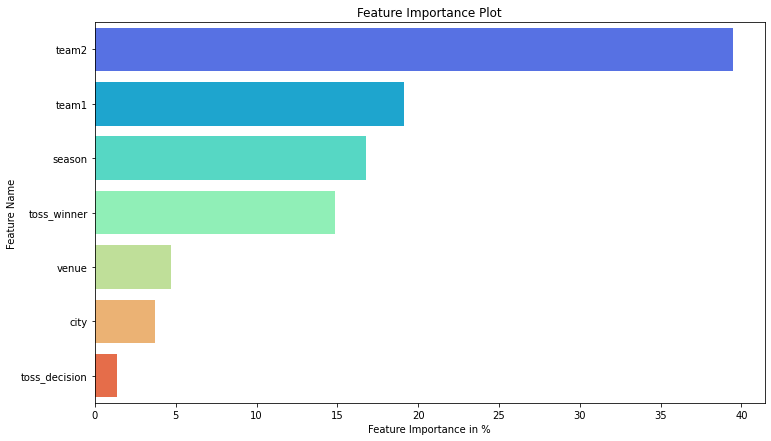

In [62]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=x[0],y=x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [45]:
model_gscv = {best_grid:'GridSearchCV - RandomForest Classifier'}

### Generate Training data Model performance Metrics


Checking the Metrics for Predictions on the Training set

Generating Metrics for GridSearchCV - RandomForest Classifier 
	RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=6,
                       min_samples_leaf=5, min_samples_split=5,
                       n_estimators=101, oob_score=1, random_state=101)

Accuracy for GridSearchCV - RandomForest Classifier model is 
 0.62875


Classification report for GridSearchCV - RandomForest Classifier model is 
               precision    recall  f1-score   support

           1       0.71      0.62      0.66       117
           2       0.77      0.62      0.69       104
           3       0.70      0.60      0.65        98
           4       0.62      0.49      0.55        91
           5       0.63      0.42      0.50        88
           6       0.66      0.61      0.64        80
           7       0.69      0.65      0.67        63
           8       0.61      1.00      0.76        17
           9       0.55   

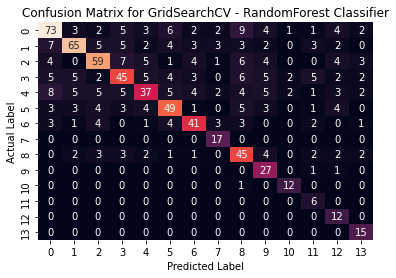

In [46]:
print ("\nChecking the Metrics for Predictions on the Training set\n")
classification_model(model_gscv, X, y)

## Verify the Predictions on Testing Dataset

In [47]:
#'team1', 'team2','city', 'toss_decision', 'toss_winner', 'venue', 
teamcode = teams['team_codes']

def predict_winner(model, input):
    output=model.predict(input)
    winner_name = get_team_name(output, teams)
#    print("The predicted winner is Team {} - {}".format(output, winner_name))
    return winner_name

## Get Predicted Winner for the given input below.

In [48]:
def get_prediction(season,T1,T2,city,toss,toss_decision,venue, best_grid):
    season = season
    team1= teamcode[T1]
    team2= teamcode[T2]
    city = le_city.transform([city])[0] 
    toss_decision = le_toss.transform([toss_decision])[0] 
    toss_winner= teamcode[toss]
    venue = le_venue.transform([venue])[0]  

    input=[season, team1, team2, city, toss_decision, toss_winner, venue]
    input = np.array(input).reshape((1, -1))

    winner = predict_winner(best_grid, input)
    return winner

In [49]:
season = 2020
team1= teamcode['KKR'] 
team2= teamcode['RCB']
city = le_city.transform(['Bangalore'])[0] 
toss_decision = le_toss.transform(['bat'])[0]  #[0-'bat', 1-'field']
toss_winner= teamcode['RCB']
venue = le_venue.transform(['M Chinnaswamy Stadium'])[0]  

input=[season, team1, team2, city, toss_decision, toss_winner, venue]
input = np.array(input).reshape((1, -1))
#print(input)

winner = predict_winner(best_grid, input)
print("The predicted winner is:", winner)

The predicted winner is: Royal Challengers Bangalore


In [50]:
#Get following Input from webpage
season = 2020
T1 = 'RCB'
T2 = 'CSK'
city = 'Dubai'
toss = 'CSK'
toss_decision = 'bat'
venue = 'Dubai International Cricket Stadium'

# Pass the best_grid and get_prediction function to pickle and input the above variables from webpage.
winner = get_prediction(season,T1,T2,city,toss,toss_decision,venue, best_grid)

#Get output in return, which can be displayed in webpage.
print("The predicted winner is:", winner)

The predicted winner is: Chennai Super Kings


In [51]:
pickle.dump(best_grid, open('iplmodel.pkl', 'wb'))

In [52]:
toss_dict = {}
for t in le_toss.classes_:
    a = le_toss.transform([t])[0]
    print("    <option value='{}'>{}</option>".format(a,t))
    toss_dict[a] = t
toss_dict

    <option value='0'>bat</option>
    <option value='1'>field</option>


{0: 'bat', 1: 'field'}

In [53]:
city_dict = {}
for c in le_city.classes_:
    a = le_city.transform([c])[0]
    print("    <option value='{}'>{}</option>".format(a,c))
    city_dict[a] = c
city_dict

    <option value='0'>Abu Dhabi</option>
    <option value='1'>Ahmedabad</option>
    <option value='2'>Bangalore</option>
    <option value='3'>Bengaluru</option>
    <option value='4'>Bloemfontein</option>
    <option value='5'>Cape Town</option>
    <option value='6'>Centurion</option>
    <option value='7'>Chandigarh</option>
    <option value='8'>Chennai</option>
    <option value='9'>Cuttack</option>
    <option value='10'>Delhi</option>
    <option value='11'>Dharamsala</option>
    <option value='12'>Dubai</option>
    <option value='13'>Durban</option>
    <option value='14'>East London</option>
    <option value='15'>Hyderabad</option>
    <option value='16'>Indore</option>
    <option value='17'>Jaipur</option>
    <option value='18'>Johannesburg</option>
    <option value='19'>Kanpur</option>
    <option value='20'>Kimberley</option>
    <option value='21'>Kochi</option>
    <option value='22'>Kolkata</option>
    <option value='23'>Mohali</option>
    <option value='24'>Mu

{0: 'Abu Dhabi',
 1: 'Ahmedabad',
 2: 'Bangalore',
 3: 'Bengaluru',
 4: 'Bloemfontein',
 5: 'Cape Town',
 6: 'Centurion',
 7: 'Chandigarh',
 8: 'Chennai',
 9: 'Cuttack',
 10: 'Delhi',
 11: 'Dharamsala',
 12: 'Dubai',
 13: 'Durban',
 14: 'East London',
 15: 'Hyderabad',
 16: 'Indore',
 17: 'Jaipur',
 18: 'Johannesburg',
 19: 'Kanpur',
 20: 'Kimberley',
 21: 'Kochi',
 22: 'Kolkata',
 23: 'Mohali',
 24: 'Mumbai',
 25: 'Nagpur',
 26: 'Port Elizabeth',
 27: 'Pune',
 28: 'Raipur',
 29: 'Rajkot',
 30: 'Ranchi',
 31: 'Sharjah',
 32: 'Visakhapatnam'}

In [54]:
venue_dict = {}
for ven in le_venue.classes_:
    a = le_venue.transform([ven])[0]
    print("    <option value='{}'>{}</option>".format(a,ven))
    venue_dict[a] = ven
venue_dict

    <option value='0'>ACA-VDCA Stadium</option>
    <option value='1'>Barabati Stadium</option>
    <option value='2'>Brabourne Stadium</option>
    <option value='3'>Buffalo Park</option>
    <option value='4'>De Beers Diamond Oval</option>
    <option value='5'>Dr DY Patil Sports Academy</option>
    <option value='6'>Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium</option>
    <option value='7'>Dubai International Cricket Stadium</option>
    <option value='8'>Eden Gardens</option>
    <option value='9'>Feroz Shah Kotla</option>
    <option value='10'>Feroz Shah Kotla Ground</option>
    <option value='11'>Green Park</option>
    <option value='12'>Himachal Pradesh Cricket Association Stadium</option>
    <option value='13'>Holkar Cricket Stadium</option>
    <option value='14'>IS Bindra Stadium</option>
    <option value='15'>JSCA International Stadium Complex</option>
    <option value='16'>Kingsmead</option>
    <option value='17'>M Chinnaswamy Stadium</option>
    <option va

{0: 'ACA-VDCA Stadium',
 1: 'Barabati Stadium',
 2: 'Brabourne Stadium',
 3: 'Buffalo Park',
 4: 'De Beers Diamond Oval',
 5: 'Dr DY Patil Sports Academy',
 6: 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 7: 'Dubai International Cricket Stadium',
 8: 'Eden Gardens',
 9: 'Feroz Shah Kotla',
 10: 'Feroz Shah Kotla Ground',
 11: 'Green Park',
 12: 'Himachal Pradesh Cricket Association Stadium',
 13: 'Holkar Cricket Stadium',
 14: 'IS Bindra Stadium',
 15: 'JSCA International Stadium Complex',
 16: 'Kingsmead',
 17: 'M Chinnaswamy Stadium',
 18: 'M. A. Chidambaram Stadium',
 19: 'M. Chinnaswamy Stadium',
 20: 'MA Chidambaram Stadium, Chepauk',
 21: 'Maharashtra Cricket Association Stadium',
 22: 'Nehru Stadium',
 23: 'New Wanderers Stadium',
 24: 'Newlands',
 25: 'OUTsurance Oval',
 26: 'Punjab Cricket Association IS Bindra Stadium, Mohali',
 27: 'Punjab Cricket Association Stadium, Mohali',
 28: 'Rajiv Gandhi International Stadium, Uppal',
 29: 'Rajiv Gandhi Intl. Cricket Stadi